In [13]:
import numpy as np
import pandas as pd

import sys
import os
import re

def gendict(namelist:list)->dict:
    return {item:[] for item in namelist}

In [96]:
path = "log20240704.txt"

In [99]:
with open(path, "r") as f:
    for line in f:
        if keyword_vec[0] in line:
            get_angle(TopVec,line)


In [100]:
TopVec

{'time': ['2024-07-04 00:01:50.382',
  '2024-07-04 00:03:17.962',
  '2024-07-04 00:05:36.295',
  '2024-07-04 00:07:21.091',
  '2024-07-04 00:09:56.786'],
 'TopVec': ['11820.2491723578',
  '11820.4604020905',
  '11820.4002768141',
  '11820.2741025502',
  '11803.4966941716']}

In [98]:
#TopDieMark计算相关关键字
keyword_top = [
           "左侧TopDieMark1定位 PR执行结果",
           "左侧上视左标定片阵列Mark定位 PR执行结果",
           "左侧TopDieMark2定位 PR执行结果",
           "左侧上视右标定片阵列Mark定位 PR执行结果",
            ]
#存储TopDieMark
TopDieMark1 = gendict(["time","TopDieMark1X","TopDieMark1Y"])
TopDieMark2 = gendict(["time","TopDieMark2X","TopDieMark2Y"])

#存储上视看左右标定片
UpLookLeftMarks = gendict(["time"]+[f"UpLookLeftMark{i//2 + 1}X" if i % 2 == 1 else f"UpLookLeftMark{i//2}Y" for i in range(1, 33)])
UpLookRightMarks = gendict(["time"]+[f"UpLookRightMarks{i//2 + 1}X" if i % 2 == 1 else f"UpLookRightMarks{i//2}Y" for i in range(1, 33)])
#BotDieMark计算相关关键字
keyword_bot = [
           "左侧BottomDieMark1定位 PR执行结果",
           "左侧左下视标定片阵列Mark定位 PR执行结果",
           "左侧BottomDieMark2定位 PR执行结果",
           "左侧右下视标定片阵列Mark定位 PR执行结果",
            ]
BottomDieMark1 = gendict(["time","BottomDieMark1X","BottomDieMark1Y"])
BottomDieMark2 = gendict(["time","BottomDieMark2X","BottomDieMark2Y"])
DownLookLeftMarks = gendict(["time"]+[f"DownLookLeftMarks{i//2 + 1}X" if i % 2 == 1 else f"DownLookLeftMarks{i//2}Y" for i in range(1, 33)])
DownLookRightMarks = gendict(["time"]+[f"DownLookRightMarks{i//2 + 1}X" if i % 2 == 1 else f"DownLookRightMarks{i//2}Y" for i in range(1, 33)])
#角度校正关键字
keyword_angle = [
        "LeftBondModule第1次角度校正",
        "LeftBondModule第2次角度校正",
        "LeftBondModule第3次角度校正"
        ]
angle1 = gendict(["time","angle1"])
angle2 = gendict(["time","angle2"])
angle3 = gendict(["time","angle3"])
#偏移校正关键字
keyword_offset = [
        "LeftBondModule第1次轴位置调整",
        "LeftBondModule第2次轴位置调整",
        "LeftBondModule轴位置校正完成，剩余压电残差",
        "校正结束时间"
        ]
Offset1 = gendict(["time","Offset1X","Offset1Y"])
Offset2 = gendict(["time","Offset2X","Offset2Y"])
YD = gendict(["time","YDX","YDY"])
EndTime = gendict(["time","Cost"])

#工艺参数
keyword_process = [
        "LeftBondModule - 当前力控值",
        "记录上次键合位置为"
]
Process = gendict(["time","Force","High"])
LastPos = gendict(["time","LastX","LastY"])

#Dielength
keyword_vec = [
           "Top vec length",
           "Bottom vec length",
           "topVecAngle",
           "bottomVecAngle"
           ]
TopVec = {'time':[],'TopVec':[]}
BottomVec = {'time':[],'BottomVec':[]}
topVecAngle = {'time':[],'topVecAngle':[]}
bottomVecAngle = {'time':[],'bottomVecAngle':[]}


In [16]:
# 输入的字符串
line = '2024-07-04 00:00:11.501 +08:00 [INF] 左侧上视右标定片阵列Mark定位 PR执行结果：{"匹配点":[{"X":1315.5395495550238,"Y":2226.3568670432828,"Angle":0.0},{"X":1406.2616329926414,"Y":2512.2398030435456,"Angle":0.0},{"X":1496.8005502289429,"Y":2798.3218416963159,"Angle":0.0},{"X":1587.5114616189999,"Y":3084.1876568389639,"Angle":0.0},{"X":1601.2008154922169,"Y":2135.5084836469682,"Angle":0.0},{"X":1691.73145472355,"Y":2421.3318262192593,"Angle":0.0},{"X":1782.2992097915039,"Y":2707.2728754542727,"Angle":0.0},{"X":1872.9074529144818,"Y":2993.2661546921304,"Angle":0.0},{"X":1887.1893646439835,"Y":2044.75120160045,"Angle":0.0},{"X":1977.8362238968355,"Y":2330.772823500949,"Angle":0.0},{"X":2068.3268406755983,"Y":2616.7689495288018,"Angle":0.0},{"X":2158.8000068138003,"Y":2902.7627626534081,"Angle":0.0},{"X":2173.0389273155238,"Y":1954.567047661073,"Angle":0.0},{"X":2263.5208135702869,"Y":2240.3888167805767,"Angle":0.0},{"X":2353.956573202503,"Y":2526.2616452494121,"Angle":0.0},{"X":2444.5107615169536,"Y":2812.1923614820448,"Angle":0.0}]}'
UpLookLeftMarks = gendict(["time"]+[f"UpLookLeftMark{i//2 + 1}X" if i % 2 == 1 else f"UpLookLeftMark{i//2}Y" for i in range(1, 33)])

def get_marklist(Dict,line):
    Dict["time"].append(line.split()[0] + " " + line.split()[1])
    # 使用正则表达式提取所有包含至少8位数字的部分
    pattern = r'\d{3,}.\d{6,}'
    matches = re.findall(pattern, input_str)
    keys = [i for i in Dict]
    for i,j in zip(keys[1:],matches):
        Dict[i].append(j)
get_marklist(UpLookLeftMarks,line)
UpLookLeftMarks

{'time': ['2024-07-04 00:00:11.501'],
 'UpLookLeftMark1X': ['1315.5395495550238'],
 'UpLookLeftMark1Y': ['2226.3568670432828'],
 'UpLookLeftMark2X': ['1406.2616329926414'],
 'UpLookLeftMark2Y': ['2512.2398030435456'],
 'UpLookLeftMark3X': ['1496.8005502289429'],
 'UpLookLeftMark3Y': ['2798.3218416963159'],
 'UpLookLeftMark4X': ['1587.5114616189999'],
 'UpLookLeftMark4Y': ['3084.1876568389639'],
 'UpLookLeftMark5X': ['1601.2008154922169'],
 'UpLookLeftMark5Y': ['2135.5084836469682'],
 'UpLookLeftMark6X': ['1691.73145472355'],
 'UpLookLeftMark6Y': ['2421.3318262192593'],
 'UpLookLeftMark7X': ['1782.2992097915039'],
 'UpLookLeftMark7Y': ['2707.2728754542727'],
 'UpLookLeftMark8X': ['1872.9074529144818'],
 'UpLookLeftMark8Y': ['2993.2661546921304'],
 'UpLookLeftMark9X': ['1887.1893646439835'],
 'UpLookLeftMark9Y': ['2044.75120160045'],
 'UpLookLeftMark10X': ['1977.8362238968355'],
 'UpLookLeftMark10Y': ['2330.772823500949'],
 'UpLookLeftMark11X': ['2068.3268406755983'],
 'UpLookLeftMark11Y

In [12]:
def get_diemark(Dict,line):
    Dict["time"].append(line.split()[0] + " " + line.split()[1])
    pattern = r'\d{3,}.\d{6,}'
    matches = re.findall(pattern, line)
    keys = [i for i in Dict]
    Dict[keys[1]].append(matches[0])
    Dict[keys[2]].append(matches[1])
line = '2024-07-04 22:52:42.342 +08:00 [INF] 左侧TopDieMark1定位_2 PR执行结果：{"匹配点":[{"X":2427.5696515922946,"Y":4414.0279300509992,"Angle":0.0}]}'

TopDieMark1 = gendict(["time","TopDieMark1X","TopDieMark1Y"])
get_diemark(TopDieMark1,line)
TopDieMark1

{'time': ['2024-07-04 22:52:42.342'],
 'TopDieMark1X': ['2427.5696515922946'],
 'TopDieMark1Y': ['4414.0279300509992']}

In [25]:
def get_angle(Dict,line):
    Dict["time"].append(line.split()[0] + " " + line.split()[1])
    pattern = r'[-]?\d{1,}.\d{6,}'
    matches = re.findall(pattern, line)
    keys = [i for i in Dict]
    Dict[keys[1]].append(matches[0])
line = '2024-07-04 22:54:02.840 +08:00 [INF] LeftBondModule第1次角度校正，DD旋转角度：-0.517601726621479°'
angle1 = gendict(["time","angle1"])
get_angle(angle1,line)
angle1

{'time': ['2024-07-04 22:54:02.840'], 'angle1': ['-0.517601726621479']}

In [33]:
def get_offset(Dict,line):
    Dict["time"].append(line.split()[0] + " " + line.split()[1])
    pattern = r'[-]?\d{1,}.\d{6,}'
    matches = re.findall(pattern, line)
    keys = [i for i in Dict]
    Dict[keys[1]].append(matches[0])
    Dict[keys[2]].append(matches[1])
line = '2024-07-04 22:54:43.848 +08:00 [INF] LeftBondModule第1次轴位置调整：轴偏移[(405.134359656827, -461.865109922026)]um'
Offset1 = gendict(["time","Offset1X","Offset1Y"])
get_offset(Offset1,line)
Offset1

{'time': ['2024-07-04 22:54:43.848'],
 'Offset1X': ['405.134359656827'],
 'Offset1Y': ['-461.865109922026']}

In [34]:
def get_offset(Dict,line):
    Dict["time"].append(line.split()[0] + " " + line.split()[1])
    pattern = r'[-]?\d{1,}.\d{6,}'
    matches = re.findall(pattern, line)
    keys = [i for i in Dict]
    Dict[keys[1]].append(matches[0])
    Dict[keys[2]].append(matches[1])
line = '2024-07-04 22:54:58.430 +08:00 [INF] LeftBondModule轴位置校正完成，剩余压电残差：(-0.459316293809083, 0.409140608931701)，压电开始运动'
YD = gendict(["time","YDX","YDY"])
get_offset(YD,line)
YD

{'time': ['2024-07-04 22:54:58.430'],
 'YDX': ['-0.459316293809083'],
 'YDY': ['0.409140608931701']}

In [38]:
def get_endtime(Dict,line):
    Dict["time"].append(line.split()[0] + " " + line.split()[1])
    pattern = r'\d{3,}.\d{3,}'
    matches = re.findall(pattern, line)
    keys = [i for i in Dict]
    Dict[keys[1]].append(matches[0])
line = '2024-07-04 22:54:58.445 +08:00 [INF] 校正结束时间=2024/7/4 22:54:58  耗时=23936.4224ms'
EndTime = gendict(["time","Cost"])
get_endtime(EndTime,line)
EndTime

{'time': ['2024-07-04 22:54:58.445'], 'Cost': ['23936.4224']}

In [79]:
def get_process(Dict,line):
    Dict["time"].append(line.split()[0] + " " + line.split()[1])
    pattern = r'[-]?\d{3,}.\d{3,}'
    matches = re.findall(pattern, line)
    keys = [i for i in Dict]
    for i,j in zip(keys[1:],matches):
        Dict[i].append(j)
line = '2024-07-04 23:11:15.961 +08:00 [INF] LeftBondModule - 当前力控值：399.1515g, 高度：-3174.15511263271'
Process = gendict(["time","Force","High"])
get_process(Process,line)
Process

{'time': ['2024-07-04 23:11:15.961'],
 'Force': ['399.1515'],
 'High': ['-3174.15511263271']}

In [80]:
def get_process(Dict,line):
    Dict["time"].append(line.split()[0] + " " + line.split()[1])
    pattern = r'[-]?\d{3,}.\d{3,}'
    matches = re.findall(pattern, line)
    keys = [i for i in Dict]
    for i,j in zip(keys[1:],matches):
        Dict[i].append(j)
line = '2024-07-04 23:11:18.985 +08:00 [INF] LeftBondModule - 记录上次键合位置为[240953.689790259, 39539.6122937511]'
LastPos = gendict(["time","LastX","LastY"])
get_process(LastPos,line)
LastPos

{'time': ['2024-07-04 23:11:18.985'],
 'LastX': ['240953.689790259'],
 'LastY': ['39539.6122937511']}

In [94]:
def get_angle(Dict,line):
    Dict["time"].append(line.split()[0] + " " + line.split()[1])
    pattern = r'[-]?\d{1,}.\d{6,}'
    matches = re.findall(pattern, line)
    keys = [i for i in Dict]
    Dict[keys[1]].append(matches[0])
line = '2024-07-04 23:11:33.979 +08:00 [INF] [校正角度]topVecAngle1.62120383706849'
topVecAngle = {'time':[],'topVecAngle':[]}
get_angle(topVecAngle,line)
topVecAngle

{'time': ['2024-07-04 23:11:33.979'], 'topVecAngle': ['1.62120383706849']}

In [101]:
def get_angle(Dict,line):
    Dict["time"].append(line.split()[0] + " " + line.split()[1])
    pattern = r'[-]?\d{1,}.\d{6,}'
    matches = re.findall(pattern, line)
    keys = [i for i in Dict]
    Dict[keys[1]].append(matches[0])
line = '2024-07-04 19:30:42.668 +08:00 [INF] Top Vec Length = 12400.6863934434'
TopVec = {'time':[],'TopVec':[]}
get_angle(TopVec,line)
TopVec

{'time': ['2024-07-04 19:30:42.668'], 'TopVec': ['12400.6863934434']}

In [56]:
line = '":[{"X":3004.4083315511753,"Y":3293.8011828353156,"Angle":0.0},{"X":3212.268107817722,"Y":3633.2607789448048,"Angle":0.0},{"X":3344.097499262909,"Y":3086.257270733001,"Angle":0.0},{"X":3552.02845576906,"Y":3425.6276254105196,"Angle":0.0}]} '
pattern = r'\d{3,}.\d{6,}'
matches = re.findall(pattern, line)
matches = np.array(matches,dtype = float)
matches

array([3004.40833155, 3293.80118284, 3212.26810782, 3633.26077894,
       3344.09749926, 3086.25727073, 3552.02845577, 3425.62762541])

In [57]:
((matches[0]-matches[2])**2 + (matches[1]-matches[3])**2 )**0.5

398.0433443488239

In [58]:
((matches[4]-matches[6])**2 + (matches[5]-matches[7])**2 )**0.5

398.00442247229836

In [63]:
line = '{"匹配点":[{"X":3344.224427503379,"Y":3086.4374718511144,"Angle":0.0},{"X":3004.6123057477944,"Y":3293.9566438767392,"Angle":0.0},{"X":3552.0400502651069,"Y":3425.8733759367751,"Angle":0.0},{"X":3212.3656995749175,"Y":3633.4843738778586,"Angle":0.0}]} '
pattern = r'\d{3,}.\d{6,}'
matches = re.findall(pattern, line)
matches = np.array(matches,dtype = float)
matches

array([3344.2244275 , 3086.43747185, 3004.61230575, 3293.95664388,
       3552.04005027, 3425.87337594, 3212.36569957, 3633.48437388])

In [64]:
((matches[0]-matches[2])**2 + (matches[1]-matches[3])**2 )**0.5

397.9957286222189

In [65]:
((matches[4]-matches[6])**2 + (matches[5]-matches[7])**2 )**0.5

398.09671059039704

In [66]:
line = '{"匹配点":[{"X":1639.7610416147279,"Y":3488.2706282339309,"Angle":0.0},{"X":2031.0702866248071,"Y":3567.091586559196,"Angle":0.0},{"X":1560.8310725959793,"Y":3879.3537407456479,"Angle":0.0},{"X":1952.1212637987253,"Y":3958.2101469672421,"Angle":0.0}]}  '
pattern = r'\d{3,}.\d{6,}'
matches = re.findall(pattern, line)
matches = np.array(matches,dtype = float)
matches

array([1639.76104161, 3488.27062823, 2031.07028662, 3567.09158656,
       1560.8310726 , 3879.35374075, 1952.1212638 , 3958.21014697])

In [67]:
((matches[0]-matches[2])**2 + (matches[1]-matches[3])**2 )**0.5

399.1687220984021

In [68]:
((matches[4]-matches[6])**2 + (matches[5]-matches[7])**2 )**0.5

399.15704495056406

In [73]:
line = '":[{"X":706.74059584430984,"Y":3059.6295127963917,"Angle":0.0},{"X":1018.6336416781601,"Y":3568.3189633217034,"Angle":0.0},{"X":1330.4867034489153,"Y":4077.7768231110581,"Angle":0.0},{"X":1642.2980692845506,"Y":4587.25464563027,"Angle":0.0}]} '
pattern = r'\d{3,}.\d{6,}'
matches = re.findall(pattern, line)
matches = np.array(matches,dtype = float)
for i in range(4):
    print(((matches[i]-matches[i+2])**2 + (matches[i+1]-matches[i+3])**2 )**0.5)

596.6927426366603
596.6718438233347
597.3270821224701
597.3053145297087


In [74]:
line = '":[{"X":707.101681453851,"Y":3059.7391606768424,"Angle":0.0},{"X":1018.9038372971478,"Y":3568.21922578803,"Angle":0.0},{"X":1330.7596286350392,"Y":4077.7796527532605,"Angle":0.0},{"X":1642.6408109214663,"Y":4587.2481340050754,"Angle":0.0}]} '
pattern = r'\d{3,}.\d{6,}'
matches = re.findall(pattern, line)
matches = np.array(matches,dtype = float)
for i in range(4):
    print(((matches[i]-matches[i+2])**2 + (matches[i+1]-matches[i+3])**2 )**0.5)

596.4667308442318
596.494770477043
597.4159885037982
597.4292431689023


In [71]:
((matches[4]-matches[6])**2 + (matches[5]-matches[7])**2 )**0.5

597.3223413728988

In [2]:
path = "log20240626.txt"

In [ ]:
# TDM1 = {'time':[],
#         'TDM1X':[],'TDM1Y':[],'TDM1A':[]}
# U_LBM = {'time':[],
#         'U_LBM1X':[],'U_LBM1Y':[],
#         'U_LBM2X':[],'U_LBM2Y':[],
#         'U_LBM3X':[],'U_LBM3Y':[]}
# TDM2 = {'time':[],
#         'TDM2X':[],'TDM2Y':[],'TDM2A':[]}
# U_RBM = {'time':[],
#         'U_RBM1X':[],'U_RBM1Y':[],
#         'U_RBM2X':[],'U_RBM2Y':[],
#         'U_RBM3X':[],'U_RBM3Y':[]}

# BDM1 = {'time':[],
#         'BDM1X':[],'BDM1Y':[],'BDM1A':[]}
# D_LBM = {'time':[],
#         'D_LBM1X':[],'D_LBM1Y':[],
#         'D_LBM2X':[],'D_LBM2Y':[],
#         'D_LBM3X':[],'D_LBM3Y':[]}
# BDM2 = {'time':[],
#         'BDM2X':[],'BDM2Y':[],'BDM2A':[]}
# D_RBM = {'time':[],
#         'D_RBM1X':[],'D_RBM1Y':[],
#         'D_RBM2X':[],'D_RBM2Y':[],
#         'D_RBM3X':[],'D_RBM3Y':[]}
FH = {'time':[],
           'Force':[],
           'High':[]
           }
all_data = {
            'FH':FH
        #     'BATL':BATL,
            
        #     'TDM1':TDM1,
        #     'U_LBM':U_LBM,
        #     'TDM2':TDM2,
        #     'U_RBM':U_RBM,
        #     'BDM1':BDM1,
        #     'D_LBM':D_LBM,
        #     'BDM2':BDM2,
        #     'D_RBM':D_RBM,
        #     'TopVec':TopVec,
        #     'BottomVec':BottomVec,
        #     'CorOver':CorOver,
            }

In [6]:
keyword = ["左侧TopDieMark1定位 PR执行结果",
           "左侧上视左标定片阵列Mark定位 PR执行结果",
           "左侧TopDieMark2定位 PR执行结果",
           "左侧上视右标定片阵列Mark定位 PR执行结果",
           "左侧BottomDieMark1定位 PR执行结果",
           "左侧左下视标定片阵列Mark定位 PR执行结果",
           "左侧BottomDieMark2定位 PR执行结果",
           "左侧右下视标定片阵列Mark定位 PR执行结果",
           "对位调整完成"
           ]
TDM1 = {'time':[],
        'TDM1X':[],'TDM1Y':[],'TDM1A':[]}
U_LBM = {'time':[],
        'U_LBM1X':[],'U_LBM1Y':[],
        'U_LBM2X':[],'U_LBM2Y':[],
        'U_LBM3X':[],'U_LBM3Y':[]}
TDM2 = {'time':[],
        'TDM2X':[],'TDM2Y':[],'TDM2A':[]}
U_RBM = {'time':[],
        'U_RBM1X':[],'U_RBM1Y':[],
        'U_RBM2X':[],'U_RBM2Y':[],
        'U_RBM3X':[],'U_RBM3Y':[]}

BDM1 = {'time':[],
        'BDM1X':[],'BDM1Y':[],'BDM1A':[]}
D_LBM = {'time':[],
        'D_LBM1X':[],'D_LBM1Y':[],
        'D_LBM2X':[],'D_LBM2Y':[],
        'D_LBM3X':[],'D_LBM3Y':[]}
BDM2 = {'time':[],
        'BDM2X':[],'BDM2Y':[],'BDM2A':[]}
D_RBM = {'time':[],
        'D_RBM1X':[],'D_RBM1Y':[],
        'D_RBM2X':[],'D_RBM2Y':[],
        'D_RBM3X':[],'D_RBM3Y':[]}
CorOver = {'time':[],
           'AngleRes':[],
           }
all_data = {
        #     'BATL':BATL,
            
            'TDM1':TDM1,
            'U_LBM':U_LBM,
            'TDM2':TDM2,
            'U_RBM':U_RBM,
            'BDM1':BDM1,
            'D_LBM':D_LBM,
            'BDM2':BDM2,
            'D_RBM':D_RBM,
            'CorOver':CorOver,
            }

# #轴[BATL]相对运动
# keyword = ["轴[BATL]相对运动"]
# BATL = {'time':[],
#            'NowPos':[],
#            'RotValue':[]}



# keyword1 = ["旋转DD角度"]
# Ang_cor = {'time':[],'TM1X':[],'TM1Y':[],'TM2X':[],'TM2Y':[],'VX':[],'VY':[],'DD_angle':[]}

# keyword7 = ["[精度矩阵]:Angle合格残差:"]
# Ang_num = {'time':[], 'DD_num':[],'DD_angle':[]}

# keyword2 = ["[精度矩阵]: TopDie校正后最终偏移返回"]
# Move_cor = {'time':[],'Off_X':[],'Off_Y':[],'Off_angle':[]}

# keyword3 = ["【重要】Bottom Wafer Mark1","【重要】Bottom Wafer Mark2"]
# BW_MXY = {'time':[],'BM1X':[],'BM1Y':[],'BM2X':[],'BM2Y':[]}


# keyword5 = ["对位调整完成，当前角度残差"]
# CorOver = {'time':[],
#            'AngleRes':[],
#            #'YD_X':[],
#            #'YD_Y':[],
#          }



In [32]:
line = '2024-06-26 00:11:54.102 +08:00 [INF] 左侧TopDieMark1定位 PR执行结果：{"匹配点":[{"X":1546.8694128132643,"Y":4644.3179886888847,"Angle":-0.19702459519274107}]}'
line.split()

['2024-06-26',
 '00:11:54.102',
 '+08:00',
 '[INF]',
 '左侧TopDieMark1定位',
 'PR执行结果：{"匹配点":[{"X":1546.8694128132643,"Y":4644.3179886888847,"Angle":-0.19702459519274107}]}']

In [33]:
re.split('[:,}]', line)

['2024-06-26 00',
 '11',
 '54.102 +08',
 '00 [INF] 左侧TopDieMark1定位 PR执行结果：{"匹配点"',
 '[{"X"',
 '1546.8694128132643',
 '"Y"',
 '4644.3179886888847',
 '"Angle"',
 '-0.19702459519274107',
 ']',
 '']

In [34]:
re.split('[:,}]', line)[5]

'1546.8694128132643'

In [38]:
line = '2024-06-26 00:14:35.000 +08:00 [INF] 左侧左下视标定片阵列Mark定位 PR执行结果：{"匹配点1":[{"X":3092.3939656336929,"Y":1165.7226485881272,"Angle":0.0}],"匹配点2":[{"X":3875.4122977448751,"Y":1324.6106379239538,"Angle":0.0}],"匹配点3":[{"X":3250.7693691872933,"Y":383.18665418798605,"Angle":0.0}]}'
re.split('[:,}]', line)

['2024-06-26 00',
 '14',
 '35.000 +08',
 '00 [INF] 左侧左下视标定片阵列Mark定位 PR执行结果：{"匹配点1"',
 '[{"X"',
 '3092.3939656336929',
 '"Y"',
 '1165.7226485881272',
 '"Angle"',
 '0.0',
 ']',
 '"匹配点2"',
 '[{"X"',
 '3875.4122977448751',
 '"Y"',
 '1324.6106379239538',
 '"Angle"',
 '0.0',
 ']',
 '"匹配点3"',
 '[{"X"',
 '3250.7693691872933',
 '"Y"',
 '383.18665418798605',
 '"Angle"',
 '0.0',
 ']',
 '']

In [39]:
re.split('[:,}]', line)[21]

'3250.7693691872933'

In [7]:
with open(path, "r") as f:
    for line in f:
        if keyword[0] in line:
            """
            TDM1 = {'time':[],
            'TDM1X':[],'TDM1Y':[],'TDM1A':[]}
            
            """
            time = line.split()[0] + " " + line.split()[1] 
            TDM1['time'].append(time)
            TDM1['TDM1X'].append(re.split('[:,}]', line)[5])
            TDM1['TDM1Y'].append(re.split('[:,}]', line)[7])
            TDM1['TDM1A'].append(re.split('[:,}]', line)[9])
        elif keyword[1] in line:
            """
            U_LBM = {'time':[],
            'LBM1X':[],'LBM1Y':[],
            'LBM2X':[],'LBM2Y':[],
            'LBM3X':[],'LBM3Y':[],
            }
            """
            time = line.split()[0] + " " + line.split()[1] 
            U_LBM['time'].append(time)
            U_LBM['U_LBM1X'].append(re.split('[:,}]', line)[5])
            U_LBM['U_LBM1Y'].append(re.split('[:,}]', line)[7])
            U_LBM['U_LBM2X'].append(re.split('[:,}]', line)[13])
            U_LBM['U_LBM2Y'].append(re.split('[:,}]', line)[15])
            U_LBM['U_LBM3X'].append(re.split('[:,}]', line)[21])
            U_LBM['U_LBM3Y'].append(re.split('[:,}]', line)[23])
        
        elif keyword[2] in line:
            """
            TDM2 = {'time':[],
            'TDM2X':[],'TDM2Y':[],'TDM2A':[]}
            """
            time = line.split()[0] + " " + line.split()[1] 
            TDM2['time'].append(time)
            TDM2['TDM2X'].append(re.split('[:,}]', line)[5])
            TDM2['TDM2Y'].append(re.split('[:,}]', line)[7])
            TDM2['TDM2A'].append(re.split('[:,}]', line)[9])

        elif keyword[3] in line:
            """
            U_RBM = {'time':[],
            'U_RBM1X':[],'U-RBM1X':[],
            'U_RBM2X':[],'U_RBM2X':[],
            'U_RBM3X':[],'U_RBM3X':[]}
            """
            time = line.split()[0] + " " + line.split()[1] 
            U_RBM['time'].append(time)
            U_RBM['U_RBM1X'].append(re.split('[:,}]', line)[5])
            U_RBM['U_RBM1Y'].append(re.split('[:,}]', line)[7])
            U_RBM['U_RBM2X'].append(re.split('[:,}]', line)[13])
            U_RBM['U_RBM2Y'].append(re.split('[:,}]', line)[15])
            U_RBM['U_RBM3X'].append(re.split('[:,}]', line)[21])
            U_RBM['U_RBM3Y'].append(re.split('[:,}]', line)[23])

        elif keyword[4] in line:
            """
            BDM1 = {'time':[],
        'BDM1X':[],'BDM1Y':[],'BDM1A':[]}
            
            """
            time = line.split()[0] + " " + line.split()[1] 
            BDM1['time'].append(time)
            BDM1['BDM1X'].append(re.split('[:,}]', line)[5])
            BDM1['BDM1Y'].append(re.split('[:,}]', line)[7])
            BDM1['BDM1A'].append(re.split('[:,}]', line)[9])
        elif keyword[5] in line:
            """
            D_LBM = {'time':[],
        'D_LBM1X':[],'D_LBM1Y':[],
        'D_LBM2X':[],'D_LBM2Y':[],
        'D_LBM3X':[],'D_LBM3Y':[]}
            """
            try:
                D_LBM['D_LBM3Y'].append(re.split('[:,}]', line)[23])
                time = line.split()[0] + " " + line.split()[1] 
                D_LBM['time'].append(time)
                
                D_LBM['D_LBM1X'].append(re.split('[:,}]', line)[5])
                D_LBM['D_LBM1Y'].append(re.split('[:,}]', line)[7])
                D_LBM['D_LBM2X'].append(re.split('[:,}]', line)[13])
                D_LBM['D_LBM2Y'].append(re.split('[:,}]', line)[15])
                D_LBM['D_LBM3X'].append(re.split('[:,}]', line)[21])
                
            except:
                print(line)
        
        elif keyword[6] in line:
            """
            BDM2 = {'time':[],
        'BDM2X':[],'BDM2Y':[],'BDM2A':[]}
            """
            time = line.split()[0] + " " + line.split()[1] 
            BDM2['time'].append(time)
            BDM2['BDM2X'].append(re.split('[:,}]', line)[5])
            BDM2['BDM2Y'].append(re.split('[:,}]', line)[7])
            BDM2['BDM2A'].append(re.split('[:,}]', line)[9])

        elif keyword[7] in line:
            """
            D_RBM = {'time':[],
        'D_RBM1X':[],'D_RBM1Y':[],
        'D_RBM2X':[],'D_RBM2Y':[],
        'D_RBM3X':[],'D_RBM3Y':[]}
            """
            time = line.split()[0] + " " + line.split()[1] 
            D_RBM['time'].append(time)
            D_RBM['D_RBM1X'].append(re.split('[:,}]', line)[5])
            D_RBM['D_RBM1Y'].append(re.split('[:,}]', line)[7])
            D_RBM['D_RBM2X'].append(re.split('[:,}]', line)[13])
            D_RBM['D_RBM2Y'].append(re.split('[:,}]', line)[15])
            D_RBM['D_RBM3X'].append(re.split('[:,}]', line)[21])
            D_RBM['D_RBM3Y'].append(re.split('[:,}]', line)[23])
        elif keyword[8] in line:
            '''CorOver = {'time':[],
           'AngleRes':[],
           }
            '''
            CorOver['AngleRes'].append(line.split()[-1].split("，")[1][7:-2])
            time = line.split()[0] + " " + line.split()[1] 
            CorOver['time'].append(time)

        # if keyword[0] in line:
        #     """
        #     BATL = {'time':[],
        #    'NowPos':[],
        #    'RotValue':[]}
        #     """
        #     time = line.split()[0] + " " + line.split()[1] 
        #     BATL['time'].append(time)
        #     BATL['NowPos'].append(line.split()[-1].split("，")[1][6:-1])
        #     BATL['RotValue'].append(line.split()[-1].split("，")[2][5:-1])
                    
               

        #     try:
        #         CorOver['AngleRes'].append(line.split()[-1].split("，")[1][7:-2])
        #         time = line.split()[0] + " " + line.split()[1] 
        #         CorOver['time'].append(time)
        #     except:
        #         pass
            #CorOver['YD_X'].append(line.split()[-2].split("，")[2][6:-1])
           #CorOver['YD_Y'].append(line.split()[-1][:-4])


2024-06-26 00:25:00.573 +08:00 [INF] 左侧左下视标定片阵列Mark定位 PR执行结果：{"匹配点1":[{"X":3100.1746520007528,"Y":1162.5609468888483,"Angle":0.0}],"匹配点2":[],"匹配点3":[{"X":3262.1998403989164,"Y":379.04286154478348,"Angle":0.0}]}



In [10]:
# with open(path, "r") as f:
#     for line in f:
#         if keyword7[0] in line:
#             time = line.split()[0] +" "+ line.split()[1][:-3]
#             Ang_num['time'].append(time)
#             Ang_num['DD_num'].append(line.split()[11].split('：')[1])
#             Ang_num['DD_angle'].append(line.split()[-1].split('：')[1])
#         elif keyword[0] in line:
#             #激光干涉仪Zero
#             time1 = line.split()[0] +" "+ line.split()[1][:-3]
#             Zero_XY['time'].append(time1)
#             #Zero_X
#             Zero_X = line.split()[-1].split("，")[0].split("：")[1]
#             Zero_XY['Zero_X'].append(Zero_X)
#             #Zero_Y
#             Zero_Y = line.split()[-1].split("，")[1].split("：")[1]
#             Zero_XY['Zero_Y'].append(Zero_Y)
#         elif keyword6[0] in line:
#             time = line.split()[0] +" "+ line.split()[1][:-3]
#             P3L1_XY['time'].append(time)
#             P3L1_XY['P3L1_X'].append(line.split()[-1].split('，')[0].split('：')[1])
#             P3L1_XY['P3L1_Y'].append(line.split()[-1].split('：')[-1])
            
#         elif keyword2[0] in line:
#             "Move_cor = {'time':[],'Off_X':[],'Off_Y':[],'Off_angle':[]}"
#             time = line.split()[0] +" "+ line.split()[1][:-3]
#             Move_cor['time'].append(time)           
#             Off_X = line.split()[-4]
#             Move_cor['Off_X'].append(Off_X)
#             Off_Y = line.split()[-2][:-1]
#             Move_cor['Off_Y'].append(Off_Y)
#             Off_angle = line.split()[-1].split("：")[1]
#             Move_cor['Off_angle'].append(Off_angle)
            
#         elif keyword3[0] in line:
#             "BW_MXY = {'time':[],'BM1X':[],'BM1Y':[],'BM2X':[],'BM2Y':[]}"
#             time = line.split()[0] +" "+ line.split()[1][:-3]
#             BW_MXY['time'].append(time)
#             BM1X = line.split()[-1].split("，")[0].split("：")[1]
#             BM1Y = line.split()[-1].split("，")[1].split("：")[1]
#             BW_MXY['BM1X'].append(BM1X)
#             BW_MXY['BM1Y'].append(BM1Y)
            
#         # elif keyword1[0] in line:
#         #     time = line.split()[0] +" "+ line.split()[1][:-3]
#         #     Ang_cor['time'].append(time)
#         #     #TopDie Mark1X
#         #     TM1X = line.split()[-11].split(":")[1]
#         #     Ang_cor['TM1X'].append(TM1X)
#         #     #TopDie Mark1Y
#         #     TM1Y = line.split()[-10].split(":")[1]
#         #     Ang_cor['TM1Y'].append(TM1Y)
#         #     #TopDie Mark2X
#         #     TM2X = line.split()[-8].split(":")[1]
#         #     Ang_cor['TM2X'].append(TM2X)
#         #     #TopDie MarkYX
#         #     TM2Y = line.split()[-7].split(":")[1]
#         #     Ang_cor['TM2Y'].append(TM2Y)
#         #     #BottomDie Mark VectorX
#         #     VX = line.split()[-4]
#         #     Ang_cor['VX'].append(VX)
#         #     #BottomDie Mark VectorY
#         #     VY = line.split()[-2]
#         #     Ang_cor['VY'].append(VY)
#         #     #需要偏转的角度
#         #     DD_angle = line.split()[-1].split("：")[1]
#         #     Ang_cor['DD_angle'].append(DD_angle)
                        
        
            
        
#         elif keyword3[1] in line:            
#             BM2X = line.split()[-1].split("，")[0].split("：")[1]
#             BM2Y = line.split()[-1].split("，")[1].split("：")[1]
#             BW_MXY['BM2X'].append(BM2X)
#             BW_MXY['BM2Y'].append(BM2Y)
            
#         elif keyword4[0] in line:
#             time = line.split()[0] +" "+ line.split()[1][:-3]
#             High['time'].append(time)
#             High['high'].append(line.split()[-2])
        
#         elif keyword4[1] in line:    #Torch_F
#             #time = line.split()[0] +" "+ line.split()[1][:-3]
#             #High['time'].append(time)
#             High['Torch_F'].append(line.split('为')[1].split('g')[0])
            
#         elif keyword4[2] in line:    #Finish_F
#             #time = line.split()[0] +" "+ line.split()[1][:-3]
#             #High['time'].append(time)
#             High['Finish_F'].append(line.split()[-2].split('为')[1].split('g')[0])
#             High['Bond_Time'].append(line.split()[-1][1:])
                    
#         elif keyword5[0] in line:
#             "Bond_XY = {'time':[],'Gzt_YDX':[],'Gzt_YDY':[],'Bond_YDX':[],'Bond_YDY':[],'JG_X2':[],'JG_Y':[]}"
#             time = line.split()[0] +" "+ line.split()[1][:-3]
#             Bond_XY['time'].append(time)
#             Bond_XY['CassetteID'].append(line.split('，')[1].split('Slot')[0].split('为')[1])
#             Bond_XY['Slot'].append(line.split('，')[1].split('Slot')[1].split('为')[1])
#             Bond_XY['Die'].append(line.split('，')[3].split()[1])
#             Bond_XY['Die_ID'].append(line.split('，')[4].split()[0].split('为')[1])
#             #工作台压电XY
#             #Gzt_YDX = line.split()[-11]
#             #Bond_XY['Gzt_YDX'].append(Gzt_YDX)
#             #Gzt_YDY = line.split()[-9]
#             #Bond_XY['Gzt_YDY'].append(Gzt_YDY)
#             #Bond头压电XY
#             #Bond_YDX = line.split()[-7].split(':')[1]
#             #Bond_XY['Bond_YDX'].append(Bond_YDX)
#             #Bond_YDY = line.split()[-6].split(':')[1]
#             #Bond_XY['Bond_YDY'].append(Bond_YDY)
#             #激光干涉仪
#             JG_X2 = line.split()[-3]
#             Bond_XY['JG_X2'].append(JG_X2)
#             JG_Y = line.split()[-1]
#             Bond_XY['JG_Y'].append(JG_Y)

In [8]:
for i in all_data:
    try:
        all_data[i] = pd.DataFrame(all_data[i]).set_index('time').astype(np.float64)
        print(i,all_data[i].shape)
    except:
        all_data[i] = pd.DataFrame(all_data[i]).set_index('time')

TDM1 (54, 3)
U_LBM (51, 6)
TDM2 (50, 3)
U_RBM (50, 6)
BDM1 (234, 3)
D_LBM (242, 6)
BDM2 (148, 3)
D_RBM (244, 6)
CorOver (49, 1)


In [9]:
for i in [i for i in all_data][:-1]:
    index = []
    #j是时间索引
    for j in all_data['CorOver'].index:
        index.append(all_data[i][all_data[i].index < j].index[-1])
    all_data[i] = all_data[i].loc[index]
    all_data['CorOver'][list(all_data[i].columns)] = all_data[i].values

In [11]:
all_data['CorOver'].to_excel('626calc.xlsx')

In [12]:
df1 = all_data['CorOver']
df1.describe()

,AngleRes,TDM1X,TDM1Y,TDM1A,U_LBM1X,U_LBM1Y,U_LBM2X,U_LBM2Y,U_LBM3X,U_LBM3Y,TDM2X,TDM2Y,TDM2A,U_RBM1X,U_RBM1Y,U_RBM2X,U_RBM2Y,U_RBM3X,U_RBM3Y,BDM1X,BDM1Y,BDM1A,D_LBM1X,D_LBM1Y,D_LBM2X,D_LBM2Y,D_LBM3X,D_LBM3Y,BDM2X,BDM2Y,BDM2A,D_RBM1X,D_RBM1Y,D_RBM2X,D_RBM2Y,D_RBM3X,D_RBM3Y
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,-0.007402,1523.580496,4672.582817,-0.265212,1989.915894,1999.639001,2748.643991,1746.148595,1736.420309,1240.790708,3557.168537,3375.204448,2.992395,1907.349714,1588.144041,2666.464018,1335.003863,1653.932994,829.320585,1347.966218,3251.098309,3.918900,3086.664136,1167.157595,3869.782066,1325.537392,3244.814754,384.593195,3182.914205,2813.483588,0.029176,1176.571542,1438.248724,1856.466147,1023.714503,760.983388,758.138360
std,0.004953,30.874061,75.354863,0.168921,0.248822,0.254454,0.269263,0.251514,0.247242,0.252055,32.627186,92.842336,0.641548,0.336138,0.202156,0.330256,0.209221,0.332153,0.212773,66.407139,68.129674,25.736853,75.220122,24.701257,74.024755,18.506687,81.579084,23.492402,51.932000,79.283391,0.152099,79.973759,1.917312,83.335347,4.093228,85.381256,4.995877
min,-0.026226,1456.631214,4634.264512,-0.770103,1989.442627,1999.162060,2748.105418,1745.671433,1735.935868,1240.285240,3494.073163,3337.448800,0.340431,1906.905413,1587.745190,2666.027599,1334.590452,1653.487894,828.884536,1077.929902,3209.260776,-0.055067,2790.886902,1073.213093,3578.535885,1256.718178,2923.905443,296.044864,3072.199917,2770.518096,-0.294288,861.574923,1437.075150,1527.693591,1011.453241,424.565089,745.346955
25%,-0.009141,1512.312714,4651.661390,-0.349501,1989.763959,1999.453031,2748.494756,1745.963211,1736.279250,1240.608635,3546.648883,3346.401994,3.046212,1907.091981,1588.028355,2666.238753,1334.883319,1653.685925,829.205954,1345.807071,3230.240376,0.111779,3090.154013,1163.563716,3873.225945,1322.734397,3248.358749,381.276667,3167.587256,2787.208756,-0.047183,1180.176656,1437.616068,1860.366550,1023.444213,764.993665,757.069309
50%,-0.007513,1522.094321,4660.313434,-0.296370,1989.863775,1999.629937,2748.587213,1746.136811,1736.366727,1240.782259,3554.110077,3352.503406,3.203813,1907.328881,1588.130244,2666.454571,1334.988012,1653.901702,829.304157,1361.159806,3234.567730,0.195416,3092.522284,1164.846524,3875.509349,1323.723960,3250.889655,382.305800,3180.797333,2793.147346,0.019307,1182.988180,1437.820614,1863.042553,1023.653867,767.764308,757.374194
75%,-0.005402,1531.402264,4663.495108,-0.178953,1990.046956,1999.810079,2748.769205,1746.323431,1736.528798,1240.947947,3562.710997,3356.592468,3.250953,1907.524248,1588.307775,2666.609527,1335.153778,1654.114808,829.479603,1370.994680,3238.576747,0.263634,3095.887822,1165.866375,3878.927669,1324.622990,3254.679311,383.260593,3190.606073,2804.537667,0.099116,1186.159745,1438.232945,1866.541627,1023.894089,771.402502,757.810129
max,0.005143,1651.183187,5044.189406,0.146575,1990.861489,2000.143881,2749.653766,1746.668417,1737.334844,1241.325163,3675.844510,3742.391762,3.382988,1908.901555,1588.577704,2667.965431,1335.453240,1655.453487,829.774051,1517.401697,3606.693944,180.391108,3393.076152,1267.732980,4170.790051,1401.493166,3576.292851,480.534646,3448.169852,3167.008832,0.513542,1500.538494,1447.409320,2193.493244,1046.071170,1107.146091,780.667018


### 1.求TopDieMark1在标定片1坐标系下的点
计算上视UL到标定片B1的旋转矩阵，将上视定位的TopDieMark1到标定片1原点的结果映射到标定片1坐标系上 \
也即求出TopDieMark1相对于标定片B1的坐标。表示为[B1_X_B1_TDM1,B1_Y_B1_TDM1]

In [13]:
X_ULB1_2_1,Y_ULB1_2_1 = df1['U_LBM2X'] - df1['U_LBM1X'],df1['U_LBM2Y'] - df1['U_LBM1Y']
X_ULB1_3_1,Y_ULB1_3_1 = df1['U_LBM3X'] - df1['U_LBM1X'],df1['U_LBM3Y'] - df1['U_LBM1Y']
UL_X_B1_TDM1 = df1['TDM1X'] - df1['U_LBM1X']
UL_Y_B1_TDM1 = df1['TDM1Y'] - df1['U_LBM1Y']

In [33]:
(np.arctan(Y_ULB1_2_1/X_ULB1_2_1)*180/np.pi).std()*3

0.005827539313361349

In [34]:
(np.arctan(Y_ULB1_3_1/X_ULB1_3_1)*180/np.pi).std()*3

0.007131989145265865

In [16]:
B1_XY_B1_TDM1s = []
R_B1_ULs = []
for i in range(len(X_ULB1_2_1)):
    #标定片方向矢量在视觉坐标系中的描述
    A_L = np.array([[X_ULB1_2_1[i],X_ULB1_3_1[i]],
                    [Y_ULB1_2_1[i],Y_ULB1_3_1[i]]])
    
    #标定片向量矩阵
    #标定片方向矢量在自身坐标系中的描述
    B_B = np.array([[800, 0   ],
                    [0,    800]])
    
    #^B1_UL R = B*A^-1从标定片转向上视坐标系的旋转矩阵
    R_B_L = np.dot(B_B,np.linalg.inv(A_L))
    R_B1_ULs.append(R_B_L)

    #变量乘以旋转矩阵
    b = np.array([[UL_X_B1_TDM1[i]],
                  [UL_Y_B1_TDM1[i]]])    
    B1_XY = np.dot(R_B_L,b)
    B1_XY_B1_TDM1s.append(B1_XY)

C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\3843220660.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  A_L = np.array([[X_ULB1_2_1[i],X_ULB1_3_1[i]],
C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\3843220660.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [Y_ULB1_2_1[i],Y_ULB1_3_1[i]]])
C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\3843220660.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = np.array([[UL

Mean_X:  -1289.2851766638616
3sigmaX:  67.05843658369189
Mean_Y:  -2387.214648979311
3sigmaY:  232.1435875695017


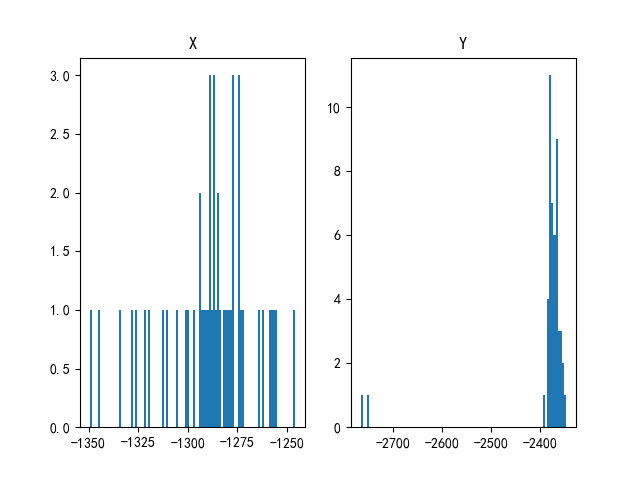

In [17]:
#将列表转换为np.array
B1_XY_B1_TDM1s = np.array(B1_XY_B1_TDM1s)

#X方向坐标
B1_X_B1_TDM1s = B1_XY_B1_TDM1s[:,0]
print("Mean_X: ",B1_X_B1_TDM1s.mean())
print("3sigmaX: ",B1_X_B1_TDM1s.std()*3)

#Y方向坐标
B1_Y_B1_TDM1s = B1_XY_B1_TDM1s[:,1]
print("Mean_Y: ",B1_Y_B1_TDM1s.mean())
print("3sigmaY: ",B1_Y_B1_TDM1s.std()*3)


fig,ax = plt.subplots(1,2)
ax[0].hist(B1_X_B1_TDM1s,bins=100)
ax[0].set_title("X")
ax[1].hist(B1_Y_B1_TDM1s,bins=100)
ax[1].set_title("Y")
plt.show()

### 2.求TopDieMark2在标定片1坐标系下的点
计算上视UL到标定片B2的旋转矩阵，将上视定位的TopDieMark2到标定片2原点的结果映射到标定片2坐标系上 \
也即求出TopDieMark2相对于标定片B2的坐标。表示为[B2_X_B2_TDM2,B2_X_B2_TDM2 \
通过标定出的T_B1_B2(标定片B2到标定片B1)传递矩阵，将B2_X_B2_TDM2映射为[B1_X_B1_TDM2,B1_Y_B1_TDM2]

In [26]:
X_ULB2_2_1,Y_ULB2_2_1 = df1['U_RBM2X'] - df1['U_RBM1X'],df1['U_RBM2Y'] - df1['U_RBM1Y']
X_ULB2_3_1,Y_ULB2_3_1 = df1['U_RBM3X'] - df1['U_RBM1X'],df1['U_RBM3Y'] - df1['U_RBM1Y']
UL_X_B2_TDM2 = df1['TDM2X'] - df1['U_RBM1X']
UL_Y_B2_TDM2 = df1['TDM2Y'] - df1['U_RBM1Y']

In [31]:
(np.arctan(Y_ULB2_2_1/X_ULB2_2_1)*180/np.pi).std()*3

0.005278765810857469

In [32]:
(np.arctan(Y_ULB2_3_1/X_ULB2_3_1)*180/np.pi).std()*3

0.0051327468492986025

In [35]:
#经过上视UL到标定片B2的旋转矩阵，将上视定位的TopDieMark2到标定片2原点的结果映射到标定片2坐标系上 [B2_X_B2_TDM2,B2_Y_B2_TDM2]
B2_XY_B2_TDM2s = []

#旋转矩阵存储
R_B2_ULs = []

#存储转换到B1标定片下的坐标
B1_XY_B1_TDM2s = [] 

T_B1_B2 = np.array([[1.00000019698036,	0.000707624373592419,	11548.444599616],
                    [0.000160584018765638,	1.00000067072042,	0.854494721912245],
                    [0,0,1]])

for i in range(len(X_ULB2_2_1)):
    #标定片方向矢量在视觉坐标系中的描述
    A_L = np.array([[X_ULB2_2_1[i],X_ULB2_3_1[i]],
                    [Y_ULB2_2_1[i],Y_ULB2_3_1[i]]])
    
    #标定片向量矩阵
    #标定片方向矢量在自身坐标系中的描述
    B_B = np.array([[((X_ULB2_2_1[i])**2 + (Y_ULB2_2_1[i])**2)**0.5, 0                                   ],
                    [0,                                    ((X_ULB2_3_1[i])**2 + (Y_ULB2_3_1[i])**2)**0.5]])
    #^B1_UL R = B*A^-1从标定片转向上视坐标系的旋转矩阵
    R_B_L = np.dot(B_B,np.linalg.inv(A_L))
    R_B2_ULs.append(R_B_L)

    #变量乘以旋转矩阵
    b = np.array([[UL_X_B2_TDM2[i]],
                  [UL_Y_B2_TDM2[i]]])    
    B2_XY = np.dot(R_B_L,b)
    B2_XY_B2_TDM2s.append(B2_XY)

    
    #通过B2->B1的传递矩阵映射
    b2 = np.array([[B2_XY[0][0]],
                   [B2_XY[1][0]],
                   [1]])
    b_B1_XY_B1_TDM2 = np.dot(T_B1_B2,b2)
    B1_XY_B1_TDM2s.append(b_B1_XY_B1_TDM2)

C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\3753703737.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  A_L = np.array([[X_ULB2_2_1[i],X_ULB2_3_1[i]],
C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\3753703737.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [Y_ULB2_2_1[i],Y_ULB2_3_1[i]]])
C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\3753703737.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  B_B = np.array(

Mean_X:  998.7863788837781
3sigmaX:  67.7367166244652
Mean_Y:  -2217.194220002301
3sigmaY:  284.3281393603407


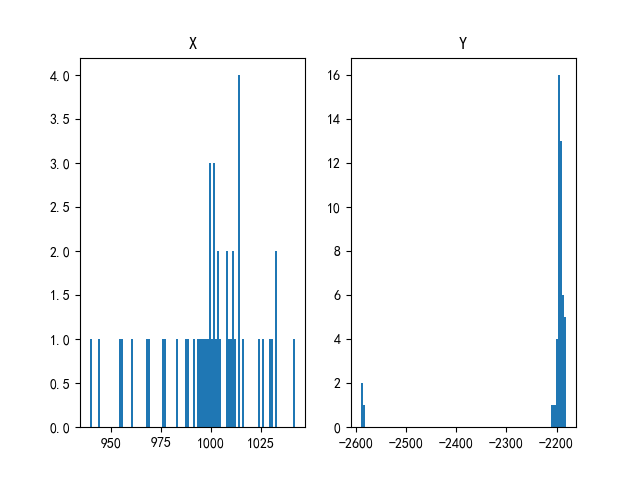

In [36]:
#将列表转换为np.array
B2_XY_B2_TDM2s = np.array(B2_XY_B2_TDM2s)

#X方向坐标
B2_X_B2_TDM2s = B2_XY_B2_TDM2s[:,0]
print("Mean_X: ",B2_X_B2_TDM2s.mean())
print("3sigmaX: ",B2_X_B2_TDM2s.std()*3)

#Y方向坐标
B2_Y_B2_TDM2s = B2_XY_B2_TDM2s[:,1]
print("Mean_Y: ",B2_Y_B2_TDM2s.mean())
print("3sigmaY: ",B2_Y_B2_TDM2s.std()*3)


fig,ax = plt.subplots(1,2)
ax[0].hist(B2_X_B2_TDM2s,bins=100)
ax[0].set_title("X")
ax[1].hist(B2_Y_B2_TDM2s,bins=100)
ax[1].set_title("Y")
plt.show()

Mean_X:  12545.662234570016
3sigmaX:  67.78745697786795
Mean_Y:  -2216.1808232672183
3sigmaY:  284.33105761007664


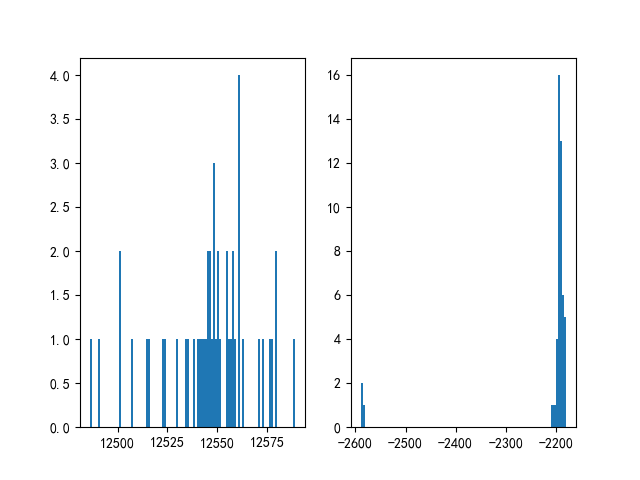

In [37]:
#将列表转换为np.array
B1_XY_B1_TDM2s = np.array(B1_XY_B1_TDM2s)
#X方向坐标
B1_X_B1_TDM2s = B1_XY_B1_TDM2s[:,0]
print("Mean_X: ",B1_X_B1_TDM2s.mean())
print("3sigmaX: ",B1_X_B1_TDM2s.std()*3)
#Y方向坐标
B1_Y_B1_TDM2s = B1_XY_B1_TDM2s[:,1]
print("Mean_Y: ",B1_Y_B1_TDM2s.mean())
print("3sigmaY: ",B1_Y_B1_TDM2s.std()*3)

fig,ax = plt.subplots(1,2)
ax[0].hist(B1_X_B1_TDM2s,bins=100)
ax[1].hist(B1_Y_B1_TDM2s,bins=100)
plt.show()

In [38]:
TopDieMarkLength = ((B1_X_B1_TDM2s - B1_X_B1_TDM1s)**2 + (B1_Y_B1_TDM2s - B1_Y_B1_TDM1s)**2)**0.5
TopDieMarkLength.mean()

13836.343890550499

In [39]:
TopDieMarkLength.std()*3

5.898888765859403

In [ ]:
all_data['BATL'].to_excel('626BATL.xlsx')

In [46]:
all_data['BATL'].to_excel('626BATL.xlsx')

In [47]:
all_data['CorOver'].to_excel('626CorOver.xlsx')

In [26]:
for i in [i for i in all_data][:-1]:
    index = []
    #j是时间索引
    for j in all_data['Bond_XY'].index:
        index.append(all_data[i][all_data[i].index < j].index[-1])
    all_data[i] = all_data[i].loc[index]
    all_data['Bond_XY'][list(all_data[i].columns)] = all_data[i].values

In [27]:
all_data['Bond_XY'].to_excel('logdata319.xlsx')

In [ ]:
line.split('，')[1]

In [ ]:
line.split('，')[1].split('Slot')

In [ ]:
map_xy_path = '../BottomWafer.xlsx'
map_xy_data = pd.read_excel(map_xy_path).set_index('芯片号')
map_xy_data

In [ ]:
die2_10 = pd.read_excel('logdata710.xlsx',sheet_name='Die2倒数157片',index_col=2)
high_map = pd.concat([map_xy_data,die2_10['high']],axis=1)
high_map

In [ ]:
X = high_map['P_X']
Y = high_map['P_Y']
Z = high_map['high']
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(X,Y,Z,cmap='coolwarm')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colormaps
colors = colormaps.get_cmap('coolwarm')
col = colors((Z-Z.mean())/(Z.min()-Z.max()))
fig = plt.figure()
ax1 = plt.axes(projection='3d')
dx = 100*np.ones_like(X)
dy = dx.copy()
dz = 50*np.ones_like(Z)
# for i in range(len(X)):
#     ax1.bar3d(X.values[i],Y.values[i],Z.values[i],dx[i],dy[i],dz[i],color=col[i],data=Z)
ax1.bar3d(X,Y,Z,dx,dy,dz,color=col)
ax1.set_xlabel('X(左-右)')
ax1.set_ylabel('Y(下-上)')
plt.show()

In [ ]:
plt.figure()
plt.quiver(high_map["P_X"],high_map["P_Y"],high_map["high"],high_map["high"],
           high_map["high"], cmap="coolwarm", units='xy')
for i in high_map.index:
    plt.annotate(i, xy=(high_map.loc[i,"P_X"],high_map.loc[i,"P_Y"]),
                 xytext=(high_map.loc[i,"P_X"],high_map.loc[i,"P_Y"]),
                 color="k")
plt.xlim(-1200,1200)
plt.ylim(-1500,1500)
plt.colorbar()
plt.title('键合高度(单位:um)')
plt.show()